In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from glob import glob
import cv2
import torch
from PIL import Image
from kbnet import data_utils
%matplotlib inline


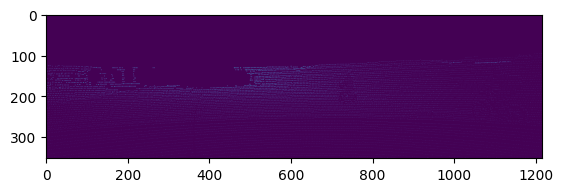

In [2]:

sdm = data_utils.load_depth('/media/master/wext/cv_data/kitti-full/data/kitti_depth_completion/validation/sparse_depth/2011_09_26_drive_0002_sync_velodyne_raw_0000000005_image_02.png')
plt.imshow(sdm)

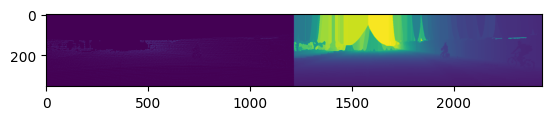

In [3]:
from scipy.interpolate import griddata
# Find the indices of the missing values
missing_indices = np.argwhere(sdm==0)

# Find the indices of the valid values
valid_indices = np.argwhere(~(sdm==0))

# Extract the valid depth values and their corresponding indices
valid_depth = sdm[~(sdm==0)]
valid_coords = valid_indices.astype(float)

# Perform nearest neighbor interpolation to estimate the missing depth values
interp_depth = griddata(valid_coords, valid_depth, missing_indices, method='nearest')

# Replace the missing values in the original depth map with the interpolated values
near_img = sdm.copy()
near_img[sdm==0] = interp_depth
concat = np.concatenate((sdm,near_img),axis=1)
plt.imshow(concat)